<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [22]</a>'.</span>

In [1]:
# Parameters
path_to_file = "data/FAE.MI.xlsx"


In [2]:
import os  
import sys  
import pandas as pd
import openpyxl
# import papermill as pm  

# get the current working directory  
cwd = os.getcwd()  
print("Current working directory:", cwd)  
  
# change the current working directory to one level up  
os.chdir("..")  
  
# get the new current working directory  
new_cwd = os.getcwd()  
print("New current working directory:", new_cwd) 

1+1

Current working directory: /home/runner/work/myfinance/myfinance/NT
New current working directory: /home/runner/work/myfinance/myfinance


2

In [3]:
# add the 'data' folder to the system path  
sys.path.append(os.path.abspath("data"))
from relative import *
from AT_funs import *



In [4]:
# Parameters  
# path_to_file: str - the path to the input file  
  
filename = path_to_file
df = read_xlsx(filename)
ticker = filename.replace('xlsx', '')
# ticker = ' '
# df
filename_bm = 'data/FTSEMIB.MI.xlsx'
bm_df = read_xlsx(filename_bm)
bm_name = filename_bm.replace('xlsx', '')

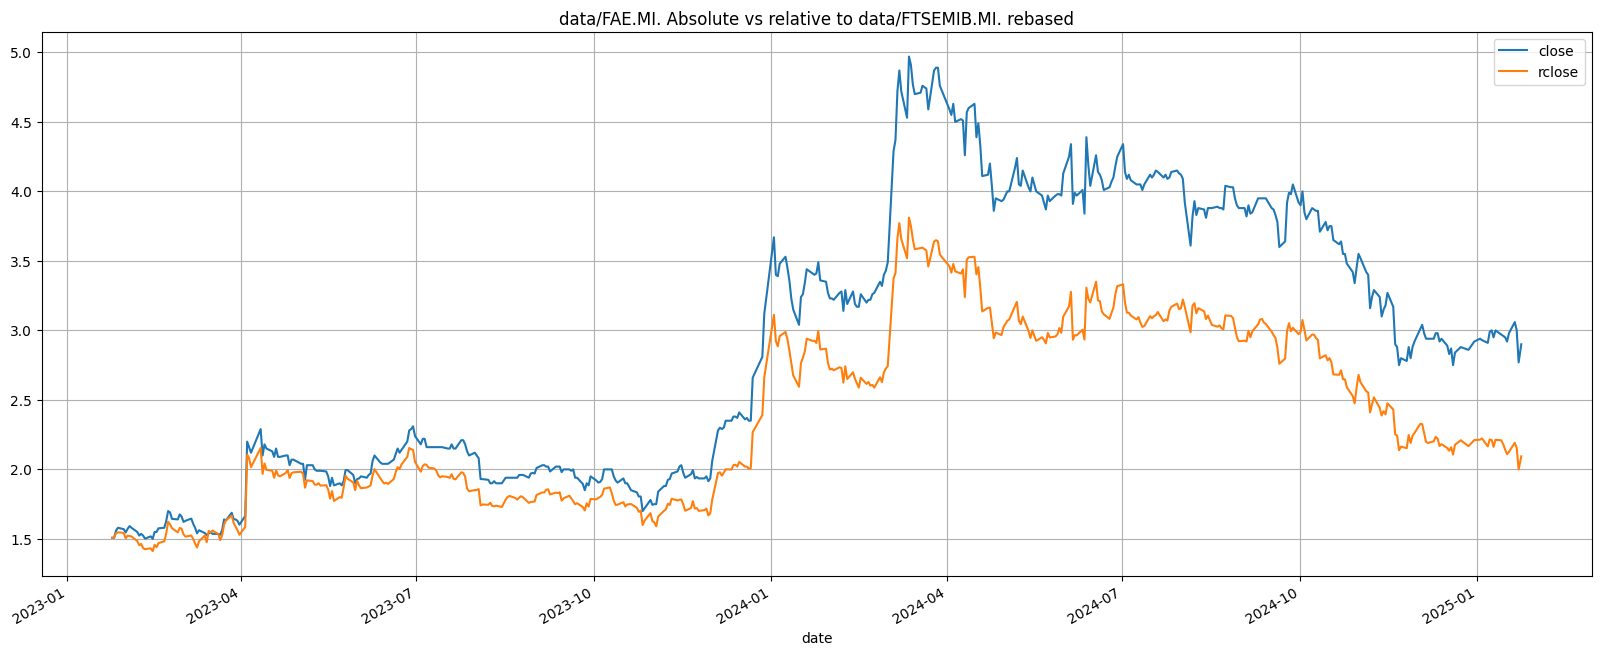

In [5]:
plot_abs_rel(df, ticker, bm_df, bm_name)

In [6]:
window_bo = 100
fast = 20
slow = 50
st = 50
mt = 100
lt = 150
lvl = 3
bm_col = 'close'
dgt = 5
window_exp = 100
starting_capital = 100000
lot = 100
mn = -0.0025
mx = -0.0075
# avg = (mn + mx) / 2
tolerance= -0.1
equal_weight = 0.05
span= 5
fx = 1

In [7]:
ohlc = ['open','high','low','close']
_o,_h,_l,_c = [ohlc[h] for h in range(len(ohlc))]
ticker = df['ticker'][0]

df = relative(df,_o,_h,_l,_c, bm_df, bm_col, dgt, rebase=True)
df = df.set_index('date')

df_bo = signal_rbo(df, window_bo, relative=True)
df_tt = signal_rtt(df, fast = fast, slow = slow, relative=True)
df_ema = signal_rema(df, st, mt, lt, relative=True)
df_sma = signal_rsma(df, st, mt, lt, relative=True)
df_fc = detect_regime(df, bm_df)

In [8]:
def plot_signal_bo(df, window, ticker, relative):

    _o,_h,_l,_c = lower_upper_OHLC(df,relative = relative)
    
    prefix_h = 'hi_'
    prefix_l = 'lo_'
    prefix_bo = 'bo_'
    close = 'close'
    if relative:
        prefix_h = 'rhi_'
        prefix_l = 'rlo_'
        prefix_bo = 'rbo_'  
        close = 'rclose'
        
    # df = df.set_index('date')
    df[[close, prefix_h + str(window), prefix_l + str(window), prefix_bo + str(window)]].plot(
        secondary_y= [prefix_bo + str(window)], figsize=(20,5), style=['k','g:','r:','b-.'], 
        title = str.upper(ticker)+' '+str(window) +' days high/low')
    plt.show()

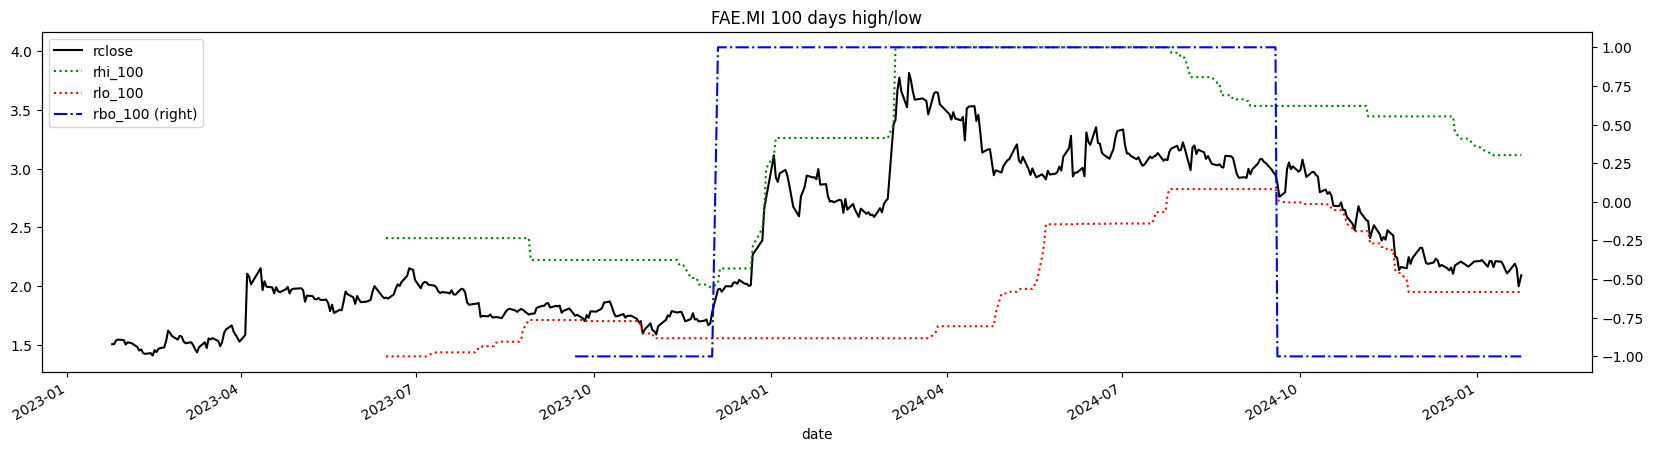

In [9]:
plot_signal_bo(df_bo, window_bo, ticker, relative = True)

In [10]:
def plot_signal_tt(df, fast, slow, relative):

    close = 'close'
    tt = 'tt_'
    if relative:
        close = 'rclose'
        tt = 'rtt_'
    
    rg_cols = [tt + str(slow)+str(fast)]

    df[[close, tt+ str(slow)+str(fast)] ].plot(
        secondary_y= rg_cols,figsize=(20,5), style=['k','b-.'], 
        title = str.upper('')+' '+str(rg_cols))
    plt.show()  

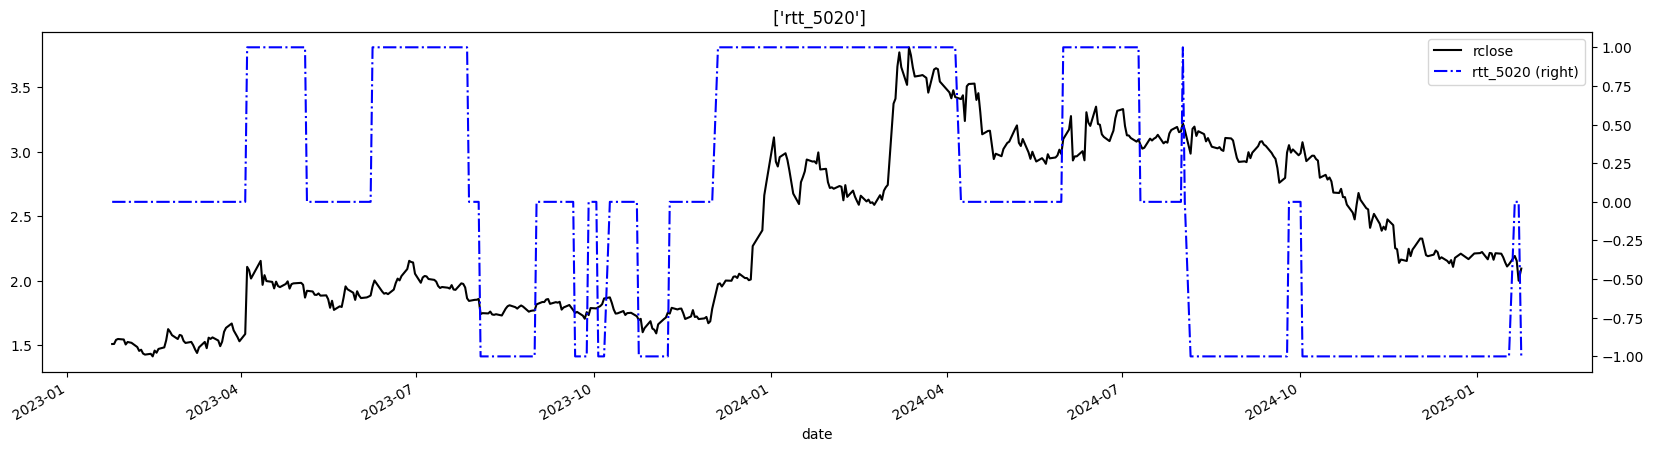

In [11]:
plot_signal_tt(df_tt, fast, slow, relative = True)

In [12]:
def plot_signal_sma(df, st, mt, lt, relative):

    close = 'close'
    sma = 'sma_'
    ema = 'ema_'
    if relative:
        close = 'rclose'
        sma = 'rsma_'
        ema = 'rema_'

    df[[close,sma+ str(st) + str(mt) + str(lt)] ].plot(
        secondary_y= sma+ str(st) + str(mt) + str(lt),figsize=(20,5), style=['k','b-.'], 
        title = str.upper('')+' '+str([sma+ str(st) + str(mt) + str(lt)]))
        
    plt.show() 

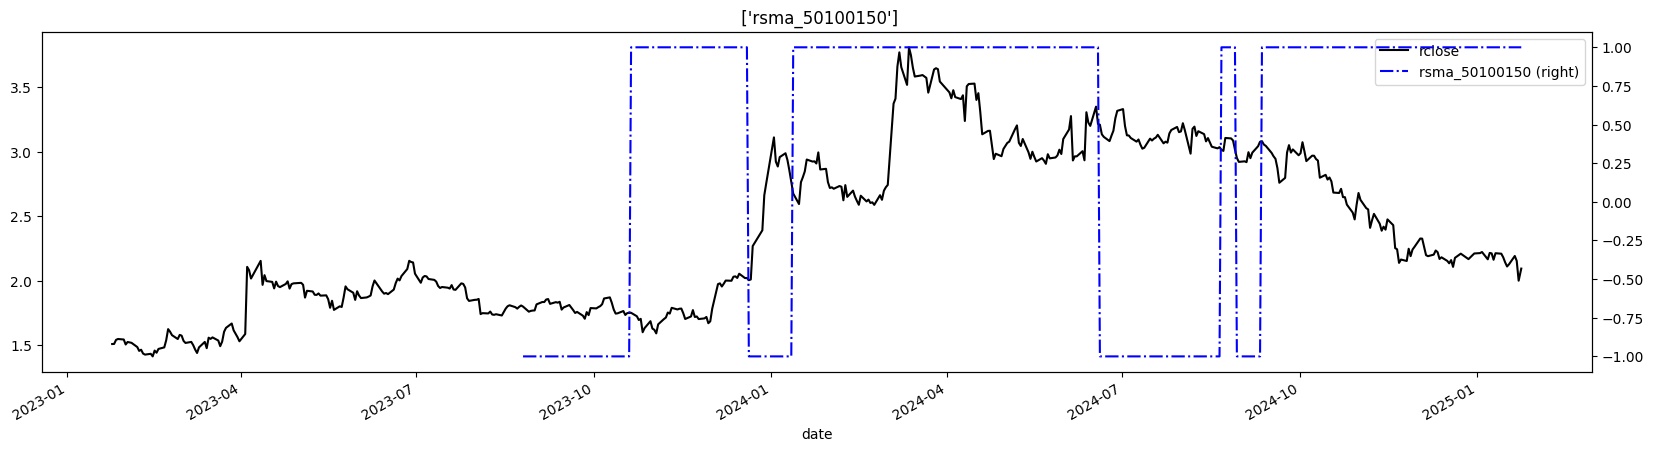

In [13]:
plot_signal_sma(df_sma, st, mt, lt, relative = True)

In [14]:
def plot_signal_ema(df, st, mt, lt, relative):

    close = 'close'
    sma = 'sma_'
    ema = 'ema_'
    if relative:
        close = 'rclose'
        sma = 'rsma_'
        ema = 'rema_'
    
    df[[close,ema+ str(st) + str(mt) + str(lt)] ].plot(
        secondary_y= ema+ str(st) + str(mt) + str(lt),figsize=(20,5), style=['k','b-.'], 
        title = str.upper('')+' '+str([ema+ str(st) + str(mt) + str(lt)]))
        
    plt.show() 

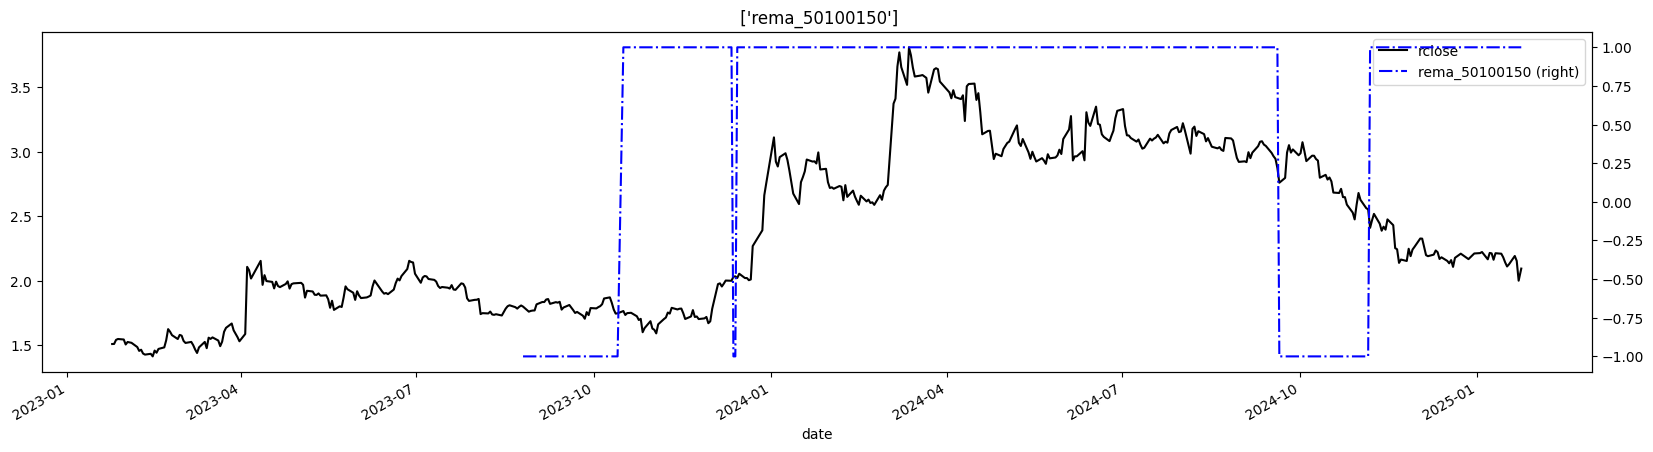

In [15]:
plot_signal_ema(df_ema, st, mt, lt, relative = True)

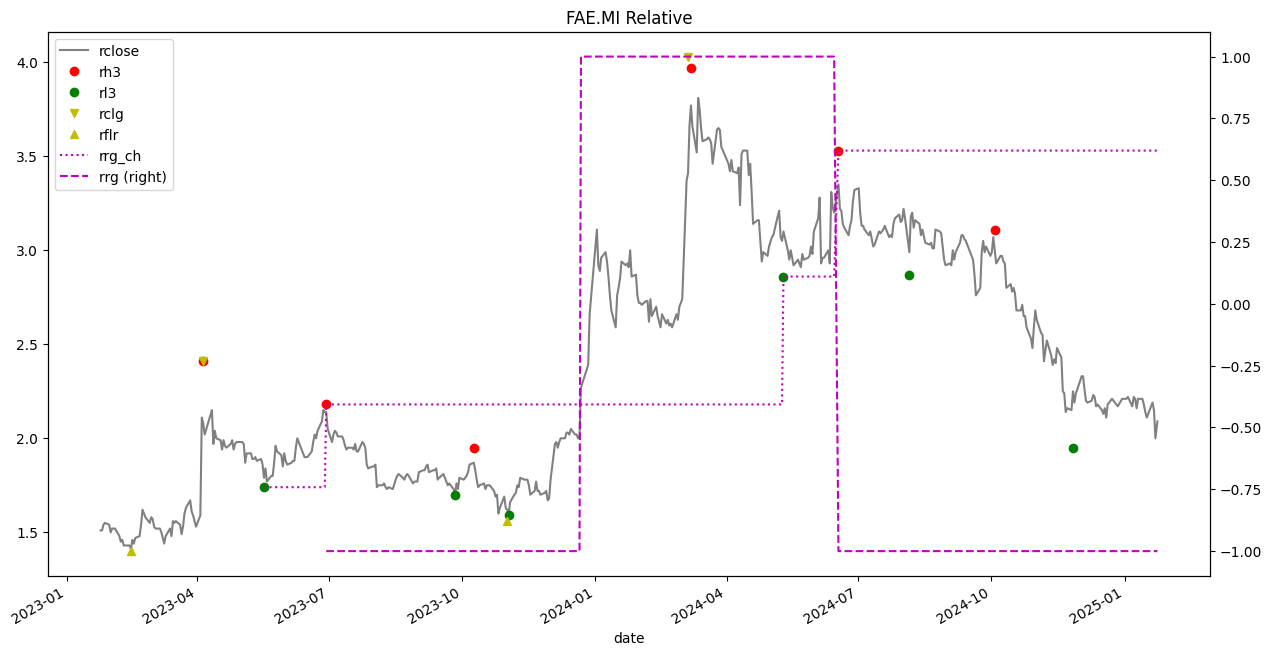

1
1


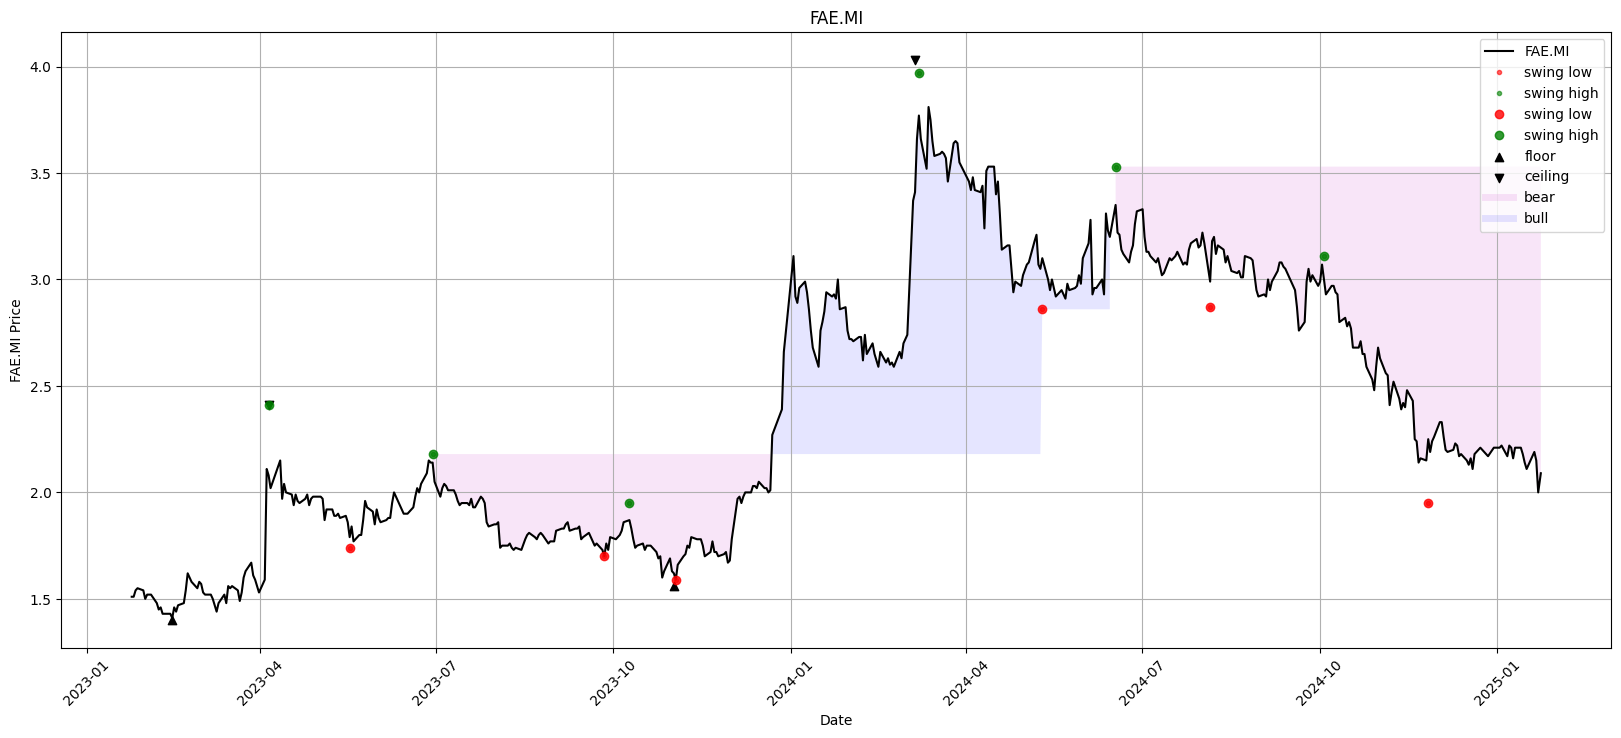

In [16]:
plot_signal_rel(df_fc, ticker)
plot_regime_rel(df_fc, ticker)

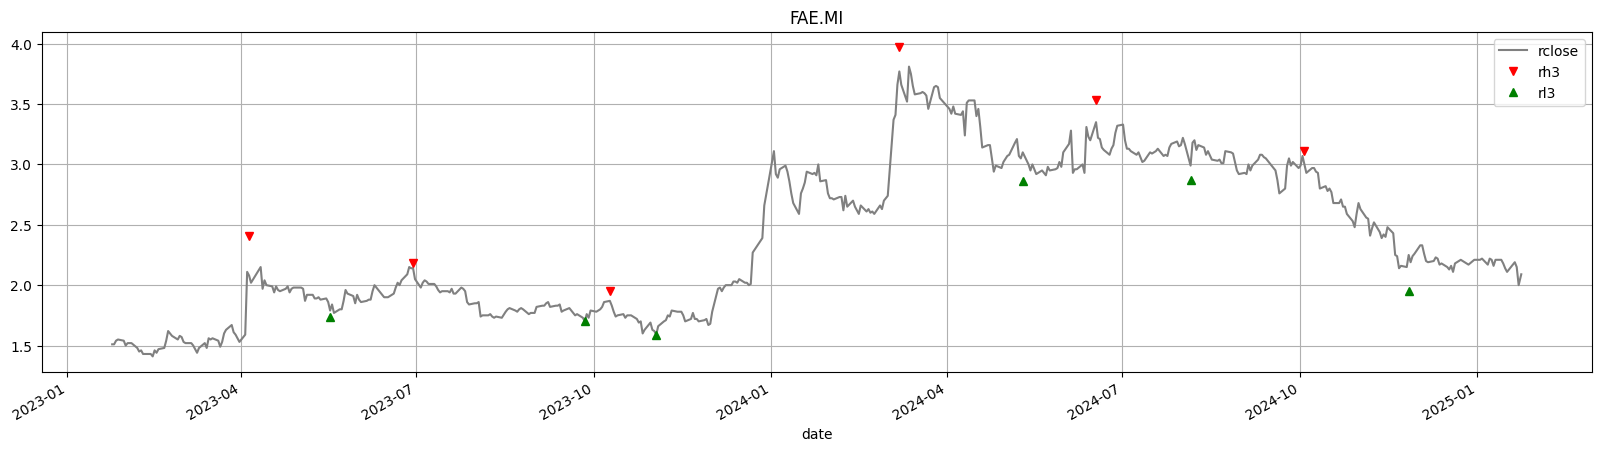

In [17]:
df_fc = df_fc.set_index('date')
df_fc[['rclose','rh3','rl3']].plot(
    style=['grey', 'rv', 'g^'],
    figsize=(20,5),grid=True, title = str.upper(ticker))
plt.show()

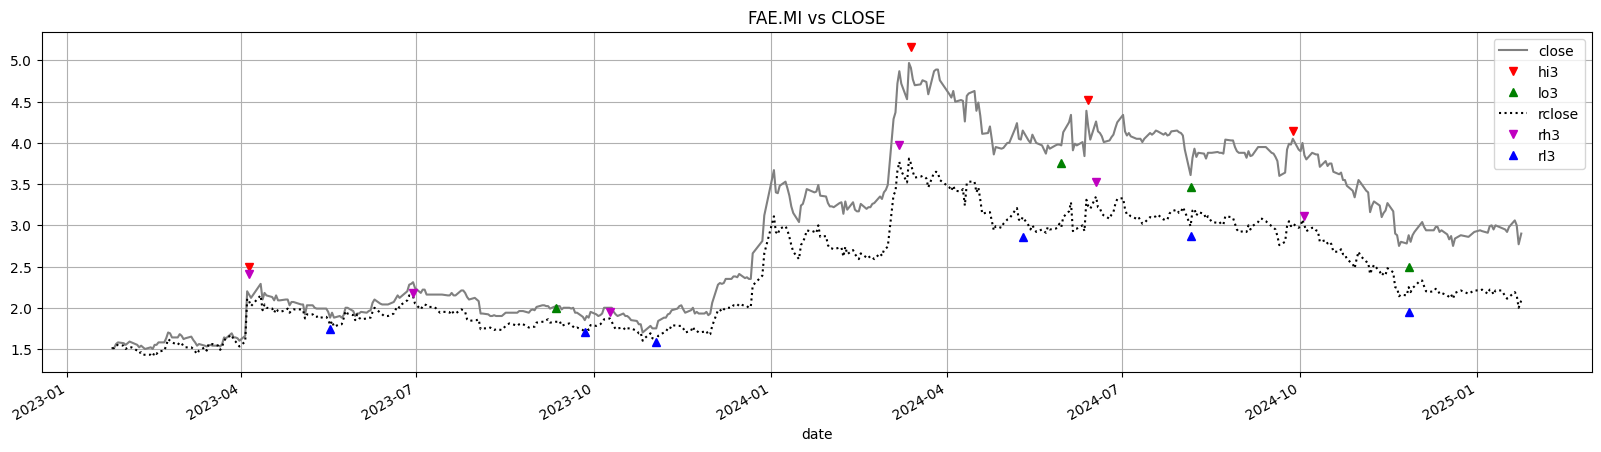

In [18]:
df_fc[['close','hi3','lo3','rclose','rh3','rl3']].plot(
    style=['grey','rv', 'g^','k:','mv','b^'],
            figsize=(20,5),grid=True, title = str.upper(ticker)+' vs '+str.upper(bm_col))
plt.show()

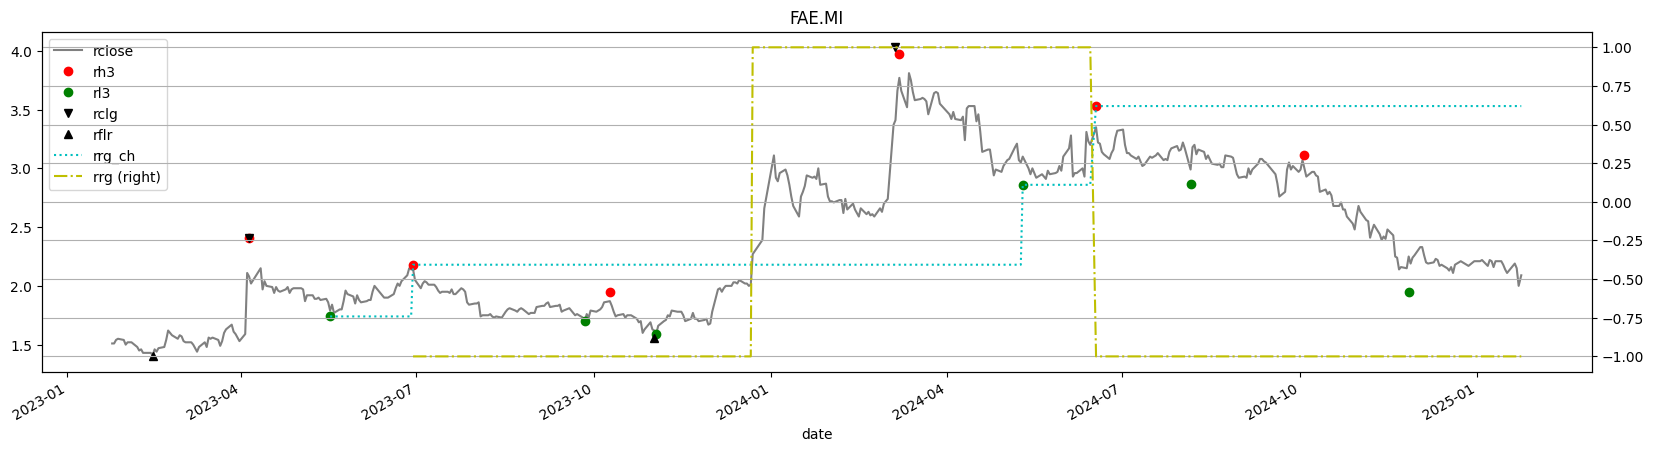

In [19]:
df_fc[['rclose','rh3', 'rl3','rclg','rflr','rrg_ch','rrg']].plot(style=['grey', 'ro', 'go', 'kv', 'k^','c:','y-.'], 
                        secondary_y= ['rrg'],figsize=(20,5),grid=True, title = str.upper(ticker))
plt.show()

In [20]:
import matplotlib.pyplot as plt 
df_filtered = df.tail(120)
df_filtered

,volume,high,low,open,close,adj_close,ticker,ropen,rhigh,rlow,...,rbo_100,rtt_50,rtt_20,rtt_5020,rema_50100,rema_100150,rema_50100150,rsma_50100,rsma_100150,rsma_50100150
date,,,,,,,,,,,,,,,,,,,,,
2024-08-01 07:00:00,11920,4.37,4.09,4.20,4.09,4.09,FAE.MI,3.30866,3.44259,3.22201,...,1.0,-1.0,1.0,1,1.0,1.0,1.0,-1.0,1.0,-1.0
2024-08-02 07:00:00,9941,4.09,3.92,4.09,3.92,3.92,FAE.MI,3.30634,3.30634,3.16891,...,1.0,-1.0,1.0,0,1.0,1.0,1.0,-1.0,1.0,-1.0
2024-08-05 07:00:00,54423,3.85,3.47,3.85,3.61,3.61,FAE.MI,3.18443,3.18443,2.87012,...,1.0,-1.0,-1.0,-1,1.0,1.0,1.0,-1.0,1.0,-1.0
2024-08-06 07:00:00,16014,3.91,3.75,3.91,3.82,3.82,FAE.MI,3.25349,3.25349,3.12036,...,1.0,-1.0,-1.0,-1,1.0,1.0,1.0,-1.0,1.0,-1.0
2024-08-07 07:00:00,12922,3.93,3.87,3.87,3.93,3.93,FAE.MI,3.14687,3.19566,3.14687,...,1.0,-1.0,-1.0,-1,1.0,1.0,1.0,-1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-17 08:00:00,15438,2.98,2.84,2.90,2.98,2.98,FAE.MI,2.06969,2.12679,2.02687,...,-1.0,-1.0,-1.0,-1,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2025-01-20 08:00:00,14126,3.06,2.90,2.90,3.06,3.06,FAE.MI,2.07679,2.19137,2.07679,...,-1.0,-1.0,-1.0,0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2025-01-21 08:00:00,13159,3.06,2.93,3.06,3.00,3.00,FAE.MI,2.19654,2.19654,2.10322,...,-1.0,-1.0,-1.0,0,-1.0,-1.0,1.0,-1.0,-1.0,1.0


In [21]:
# from mpl_finance import candlestick_ohlc 
import pandas as pd 
import matplotlib.dates as mpl_dates 
import numpy as np 
import datetime 
import mplfinance as mpf

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [22]:
df_filtered = df_filtered.reset_index()
ohlc = df_filtered.loc[:, ['date', 'open', 'high', 'low', 'close']] 

df_filtered['date'].index = pd.DatetimeIndex(df['date'])
# df_filtered.index.name = 'date'

KeyError: 'date'

In [ ]:
mpf.plot(df_filtered,type='candle')

In [ ]:
# Converting date into datetime format 
ohlc['date'] = pd.to_datetime(ohlc['date']) 
ohlc['date'] = ohlc['date'].apply(mpl_dates.date2num) 
ohlc = ohlc.astype(float) 
df_filtered['date'].index = pd.DatetimeIndex(df['date'])

In [ ]:
mpf.plot(ohlc,type='candle')

In [ ]:
 
# Creating Subplots 
fig, ax = plt.subplots() 
  
candlestick_ohlc(ax, ohlc.values, width=0.6, 
                 colorup='green', colordown='red', alpha=0.8) 
  
# Setting labels & titles 
ax.set_xlabel('Date') 
ax.set_ylabel('Price') 
fig.suptitle('Daily Candlestick Chart') 
  
# Formatting Date 
date_format = mpl_dates.DateFormatter('%d-%m-%Y') 
ax.xaxis.set_major_formatter(date_format) 
fig.autofmt_xdate() 
  
fig.tight_layout() 
  
plt.show() 